# Ultimate Technologies Inc. Take-Home Challenge


## Part 1 ‐ Exploratory data analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score


In [4]:
file_path = r"C:\Users\omnia\Google Drive\Springboard\Assigments\Ultimate Technologies Inc. Take-Home Challenge\ultimate_challenge\logins.json"
data = pd.read_json(file_path)

In [5]:
data.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [6]:
# Convert 'login_time' to datetime
if 'login_time' in data.columns:
    data['login_time'] = pd.to_datetime(data['login_time'])
    data.set_index('login_time', inplace=True)
else:
    data.index = pd.to_datetime(data.index)
    
# Resample the data into 15 minute intervals and count logins
resampled_data = data.resample('15 min').size()
resampled_data.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15min, dtype: int64

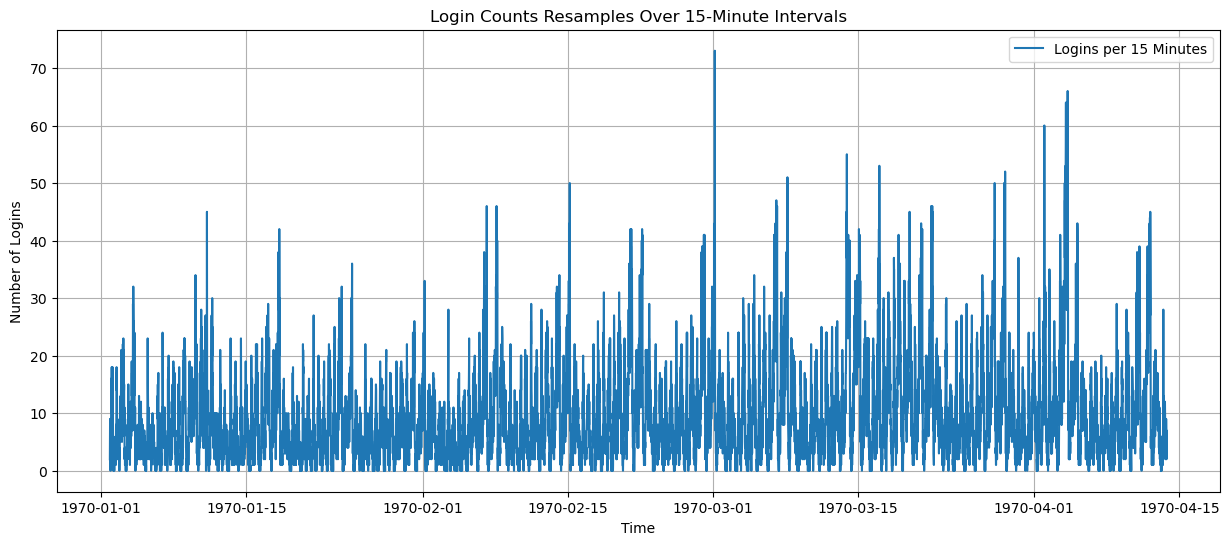

In [7]:
# Visualize the time series
plt.figure(figsize=(15, 6))
plt.plot(resampled_data, label='Logins per 15 Minutes')
plt.title('Login Counts Resamples Over 15-Minute Intervals')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
#Decompose the time series
decomposition = seasonal_decompose(resampled_data, model='additive', period=96)

<Figure size 1500x600 with 0 Axes>

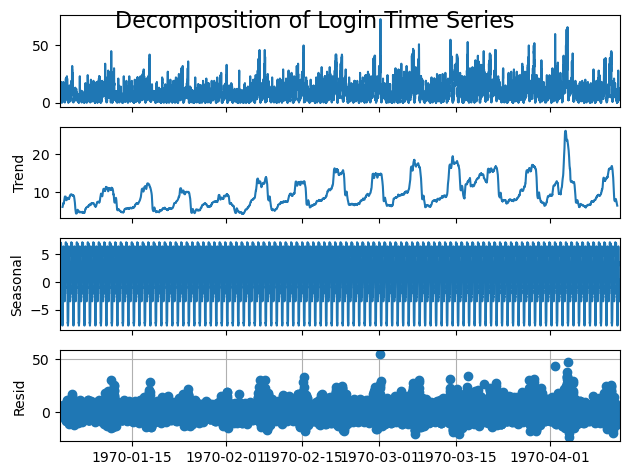

In [9]:
plt.figure(figsize=(15, 6))
decomposition.plot()
plt.suptitle('Decomposition of Login Time Series', fontsize=16)
plt.grid(True)
plt.show()

In [10]:
# Data for one day
one_day_data = resampled_data['1970-01-02']

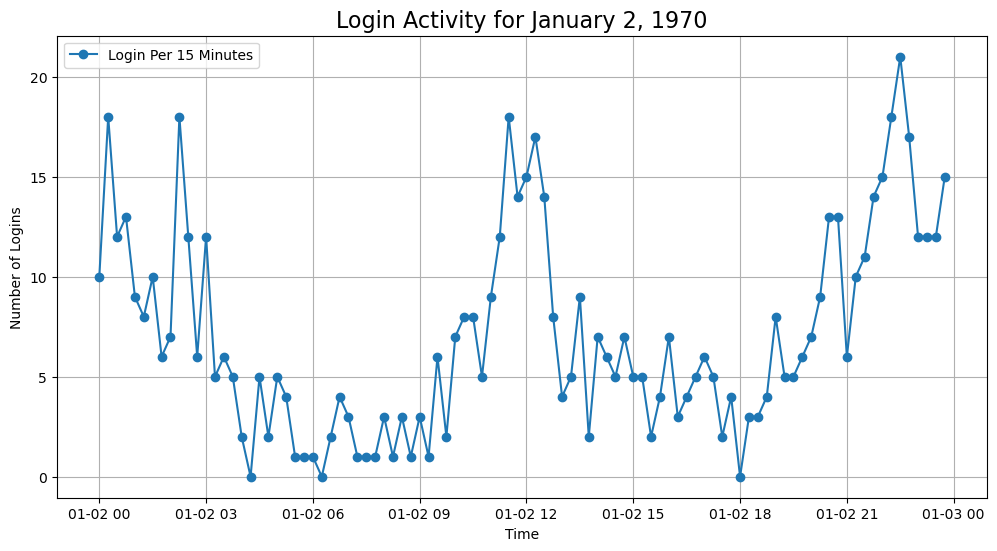

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(one_day_data, marker='o', label='Login Per 15 Minutes')
plt.title('Login Activity for January 2, 1970', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.legend()
plt.show()

#Brief Report on Features of the Demand
1. Daily Cycle: Login activity peaks during mornings, lunch hours, and evenings, reflecting user routines, while minimal logins occur during late-night and early-morning hours, consistent with sleep patterns.
2. Key Patterns:
   Seasonality: Predictable daily cycles with consistent peaks and troughs.
                     Specific Day Analysis: Login counts rise in bursts, confirming daily engagement patterns.

## Part 2 ‐ Experiment and metrics design

In [14]:
file_path2 = r"C:\Users\omnia\Google Drive\Springboard\Assigments\Ultimate Technologies Inc. Take-Home Challenge\ultimate_challenge\ultimate_data_challenge.json"
data2 = pd.read_json(file_path2)
data2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


1. Key Measure of Success
   
Key Metric: Percentage of drivers who serve both cities.

Reasoning: The goal is to encourage driver partners to operate in both cities rather than being exclusive to one. Tracking the percentage of drivers who complete trips in both Gotham and Metropolis will directly measure the success of the toll reimbursement policy.

2. Experiment Design
   
a) Implementation of the Experiment

    1. Define Groups:

    Control Group: Drivers continue operating without toll reimbursement.
    Test Group: Drivers are reimbursed for all toll costs incurred while crossing between Gotham and Metropolis.
    
    2. Random Assignment:

    Randomly assign drivers to the control or test group to minimize bias.
    Ensure both groups are balanced in terms of driver activity level, trip frequency, and other relevant characteristics.

    3. Duration:

    Run the experiment for at least 4-6 weeks to account for daily and weekly variations in demand and driver behavior.

    4.Data Collection:

    Track the number of trips completed in each city by each driver.
    Record the number of trips crossing the toll bridge.
    Capture driver earnings and other behavioral metrics, such as average trip distance or time spent online.


b) Statistical Tests

Chi-Square Test for Independence: Compare the proportion of drivers serving both cities in the test and control groups. This test evaluates whether toll reimbursement significantly increases cross-city activity.

Regression Analysis: Control for confounding variables (e.g., trip distance, driver ratings) to isolate the effect of toll reimbursement.

c) Interpretation and Recommendations

    1. Interpreting Results:

    If the test group shows a significantly higher percentage of drivers serving both cities (p-value < 0.05), the reimbursement policy is effective.
    Examine secondary metrics, like trip frequency and driver earnings, to understand the broader impact on drivers and overall operations.

    2.Recommendations:

    If successful: Implement the toll reimbursement policy for all drivers to encourage cross-city trips, ensuring the policy remains cost-effective by monitoring long-term results.
    If not successful: Investigate alternative incentives (e.g., bonuses for cross-city trips, reduced platform fees) and reevaluate barriers preventing drivers from serving both cities.

    3.Caveats:

    External factors like weather, city events, or seasonal demand might impact driver behavior during the experiment.
    Monitor for unintended consequences, such as over-concentration of drivers in one city, reducing service quality in the other.

# Part 3 ‐ Predictive modeling

In [20]:
data2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
data2['last_trip_date'] = pd.to_datetime(data2['last_trip_date'])
latest_date = data2['last_trip_date'].max()

In [23]:
# Create a binary 'retained' column: 1 if last_trip_date is within 30 days of the latest_date, else 0
data2['retained'] = (data2['last_trip_date'] >= (latest_date - pd.Timedelta(days=30))).astype(int)
retained_fraction = data2['retained'].mean()
retained_fraction, data2['retained'].value_counts()

(0.37608,
 retained
 0    31196
 1    18804
 Name: count, dtype: int64)

In [24]:
features_to_explore = ['trips_in_first_30_days', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver']

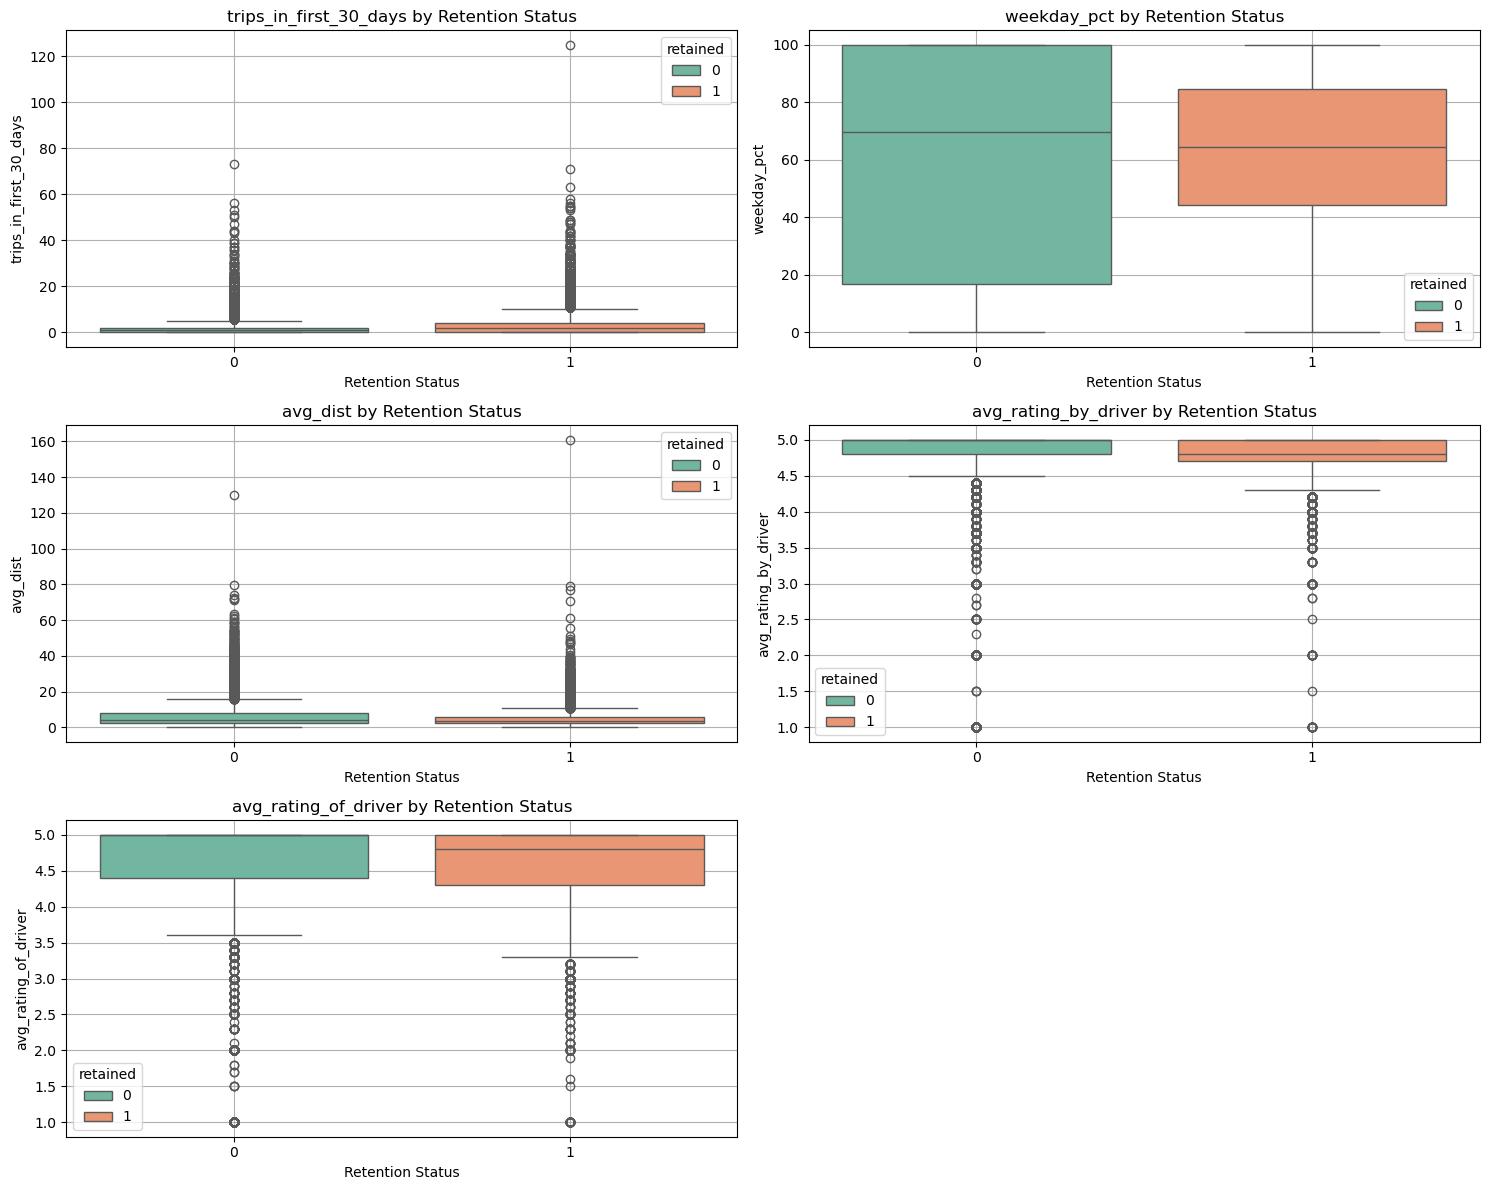

In [25]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features_to_explore, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data2, x='retained', y=feature, hue='retained', palette='Set2')
    plt.title(f'{feature} by Retention Status')
    plt.xlabel('Retention Status')
    plt.ylabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

Fraction of Retained Users: 
37.6% of users were retained (18,804 out of 50,000).

Observation: Retained users tend to take more trips in their first 30 days, have a higher percentage of weekday trips, and receive slightly higher ratings from drivers compared to non-retained users.

The distributions of average distance per trip and average ratings given to drivers are fairly similar between retained and non-retained users, indicating these features may not significantly influence retention.

In [28]:
# Handle missing values
data2['avg_rating_of_driver'] = data2['avg_rating_of_driver'].fillna(data2['avg_rating_of_driver'].mean())
data2['avg_rating_by_driver'] = data2['avg_rating_by_driver'].fillna(data2['avg_rating_by_driver'].mean())

In [29]:
# One-hot encode categorical variables
encoded_features = pd.get_dummies(data2[['city', 'phone']], drop_first=True)

In [30]:
# Combine numerical and encoded features
model_features = pd.concat([data2[['trips_in_first_30_days', 'weekday_pct', 'avg_dist', 'surge_pct',
          'avg_rating_of_driver', 'avg_rating_by_driver']], encoded_features], axis=1)

In [31]:
# Define the target variable 
target = data2['retained']

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_features, target, test_size=0.3, random_state=42)

In [33]:
# Train and evaluate Logistic Regression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
log_classification_rep = classification_report(y_test, log_pred)

In [34]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_classification_rep = classification_report(y_test, rf_pred)

In [35]:
# Train and evaluate XGBoost
xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_classification_rep = classification_report(y_test, xgb_pred)

In [36]:
# Display results
print("Logistic Regression Model")
print(f'Accuracy: {log_accuracy:.2f}')
print('Classification Report:')
print(log_classification_rep)

print("\nRandom Forest Model")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:")
print(rf_classification_rep)

print("\nXGBoost Model")
print(f"Accuracy: {xgb_accuracy:.2f}")
print("Classification Report:")
print(xgb_classification_rep)

Logistic Regression Model
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      9379
           1       0.68      0.42      0.52      5621

    accuracy                           0.71     15000
   macro avg       0.70      0.65      0.66     15000
weighted avg       0.70      0.71      0.69     15000


Random Forest Model
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      9379
           1       0.66      0.66      0.66      5621

    accuracy                           0.74     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.74      0.74      0.74     15000


XGBoost Model
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9379
           1       0.73      0.65      0.69      5621

    ac

XGBoost is the best predictive model because it achieves the highest accuracy (78%) and provides the best balance between precision and recall for retained users (Class 1).

## Ultimate can leverage the XGBoost model's insights to uncover key factors influencing rider retention, such as high engagement during the first 30 days, frequent weekday usage, or patterns related to specific cities and devices. Using these predictors, Ultimate could implement targeted strategies, including personalized promotions, early-usage incentives, or loyalty programs, to boost retention. Moreover, feature importance analysis can inform resource allocation and marketing efforts, enabling the company to prioritize users with a higher likelihood of staying engaged.